In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Missing value yok, 1338 row and 7 columns'dan olusuyor. 

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## charges column da mean: 13270, %50: 9382 oldugundan outlier value olabilir. 

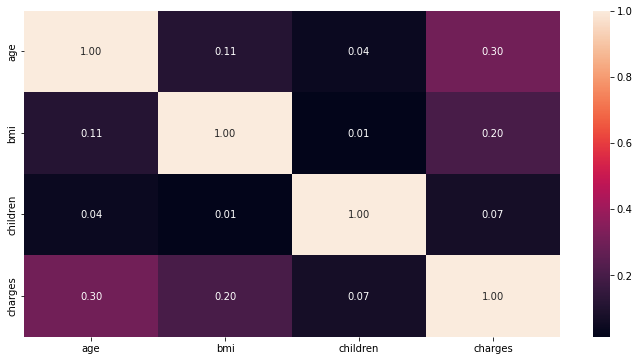

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

## charges ile age arasında %30'luk bir iliski var

In [16]:
num_cols = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() > 15]
cat_but_num = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() > 15]
cat_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() <= 15 and col not in cat_but_num]
num_but_cat = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() <= 15]
cat_cols = cat_cols + num_but_cat
print("Categoric Columns: {}\nNumeric Columns: {}\nCategoric but Numeric Columns: {}".format(cat_cols,num_cols,cat_but_num))

Categoric Columns: ['sex', 'smoker', 'region', 'children']
Numeric Columns: ['age', 'bmi', 'charges']
Categoric but Numeric Columns: []


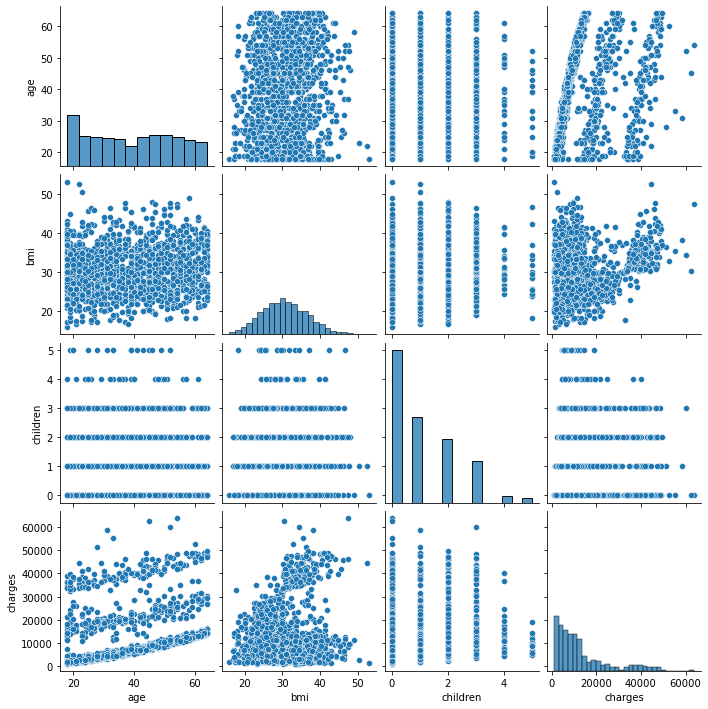

In [17]:
sns.pairplot(df)
plt.show()

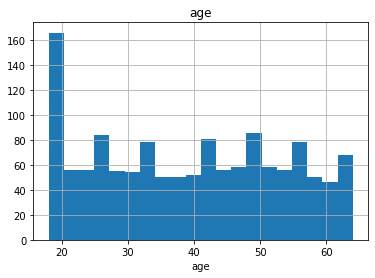

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


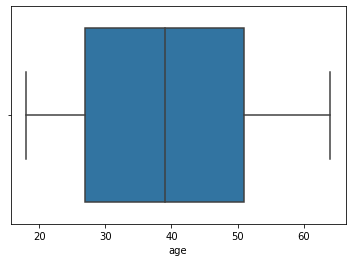

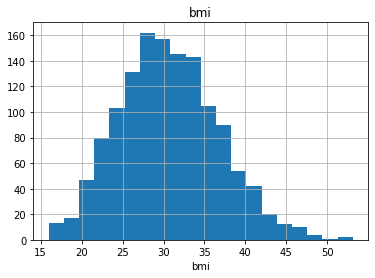

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


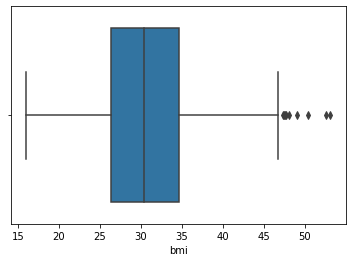

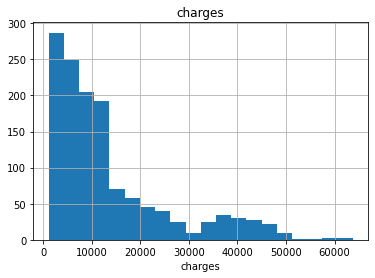

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


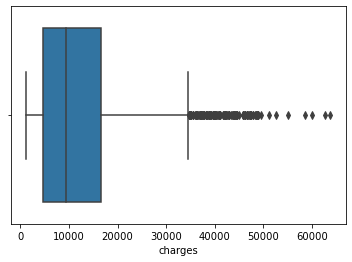

In [19]:
for col in num_cols:
    df[col].hist(bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.show()     
    sns.boxplot(df[col])
    plt.show()

##  bmi and charges kolonlarında outlier values oldugunu goruyoruz

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


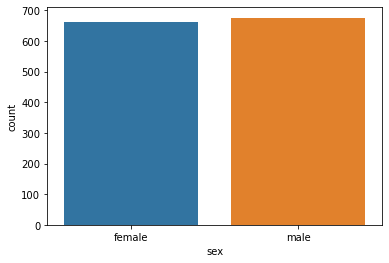

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


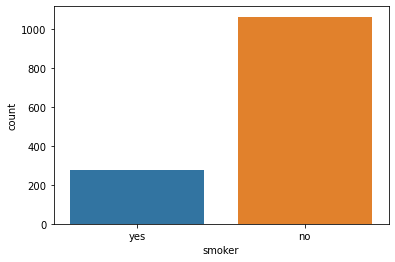

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


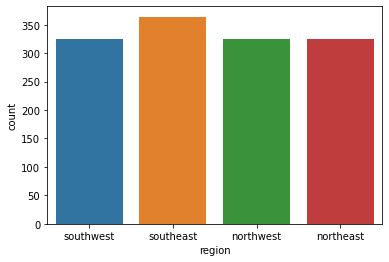

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


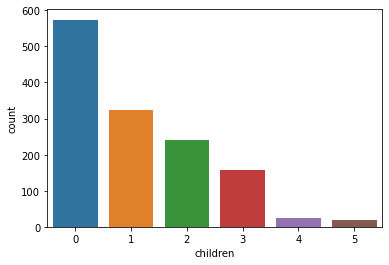

In [23]:
for col in cat_cols:
    sns.countplot(df[col])
    plt.show()

## dataset uzerinde male count, no smoker count, southeast count and 0 children count fazla oldugunu goruyoruz

<Figure size 864x576 with 0 Axes>

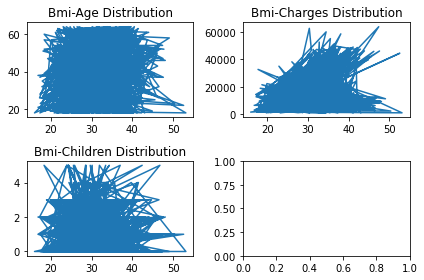

In [36]:
plt.figure(figsize=(12,8))
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(df["bmi"], df["age"])
axs[0, 0].set_title("Bmi-Age Distribution")
axs[1, 0].plot(df["bmi"], df["children"])
axs[1, 0].set_title("Bmi-Children Distribution")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(df["bmi"], df["charges"])
axs[0, 1].set_title("Bmi-Charges Distribution")
fig.tight_layout()

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

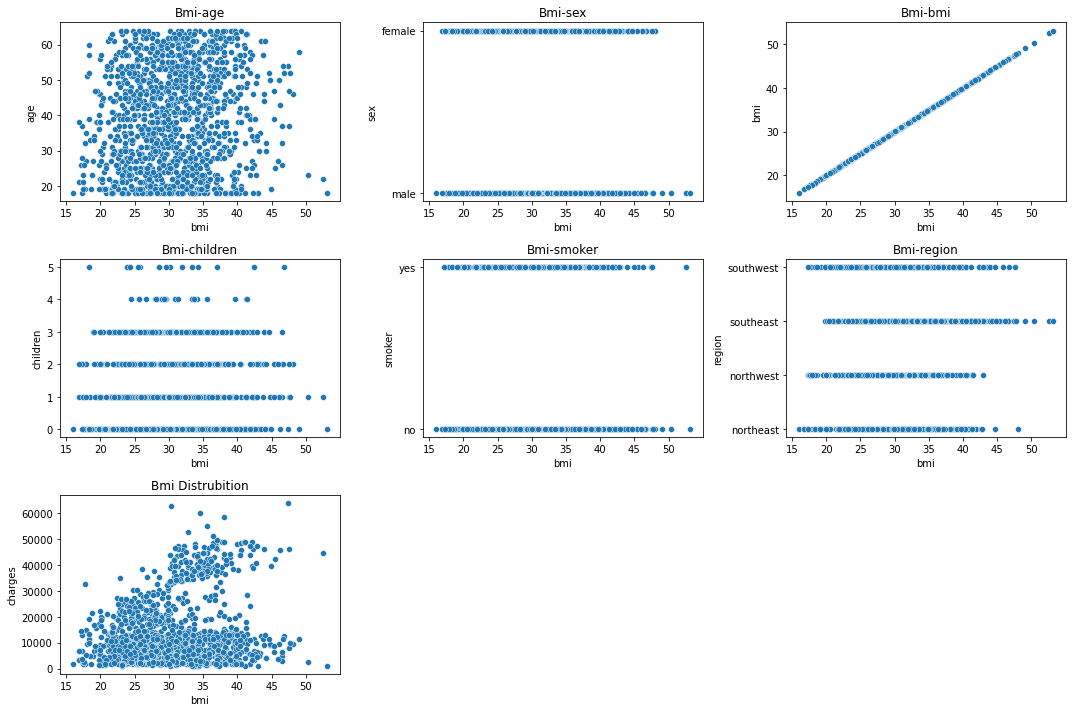

In [47]:
# BMI Distribution
count=1
plt.subplots(figsize=(15, 10))
for col in df.columns:
    plt.subplot(3,3,count).set_title("Bmi-{}".format(col))
    sns.scatterplot(df["bmi"],df[col])
    count+=1
    
plt.title("Bmi Distrubition")
plt.show()

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


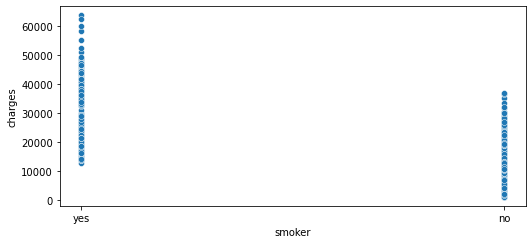

In [66]:
sns.scatterplot(df["smoker"],df["charges"])
plt.show()

## Sigara icenlerin daha fazla ucret odedigini goruyoruz 

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


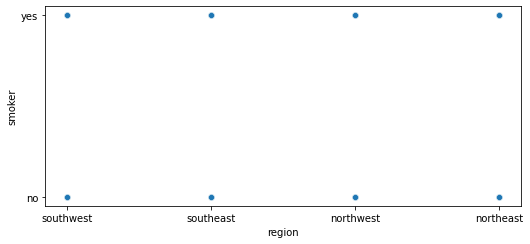

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use str

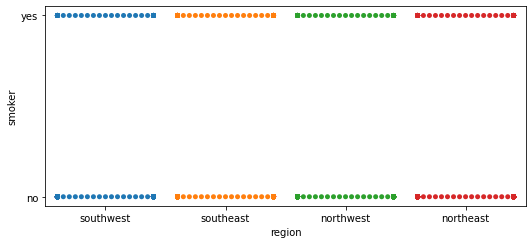

In [80]:
sns.scatterplot(df["region"],df["smoker"])
plt.show()
sns.swarmplot(df["region"],df["smoker"])
plt.show()

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


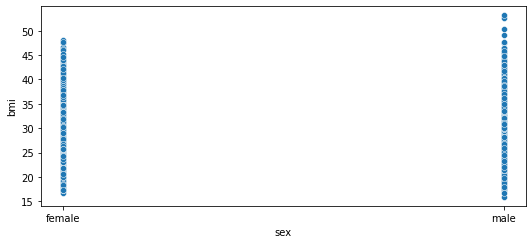

In [82]:
sns.scatterplot(df["sex"],df["bmi"])
plt.show()

## male'de vucut kitle index oranı daha fazla oldugu gorulmektedir

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


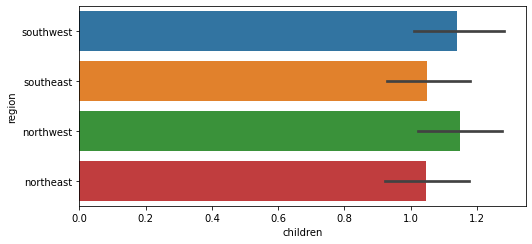

,children
region,
southeast,364
northwest,325
southwest,325
northeast,324


In [91]:
sns.barplot(df["children"],df["region"])
plt.show()
df.groupby("region").agg({"children":"count"}).sort_values("children",ascending=False)

## En cok children'a sahip olan region'ın southeast	 oldugunu goruyoruz

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


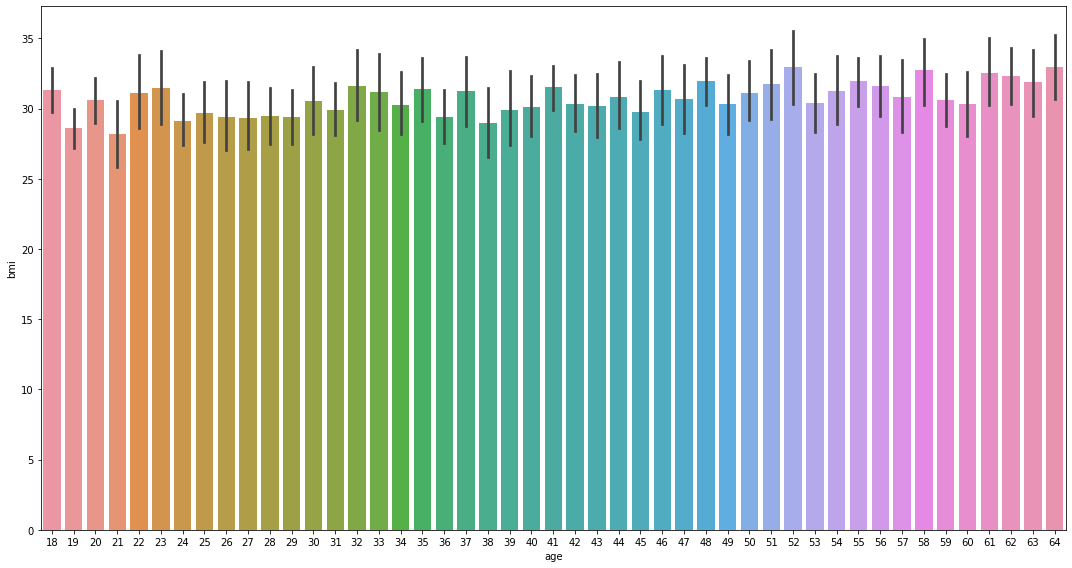

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


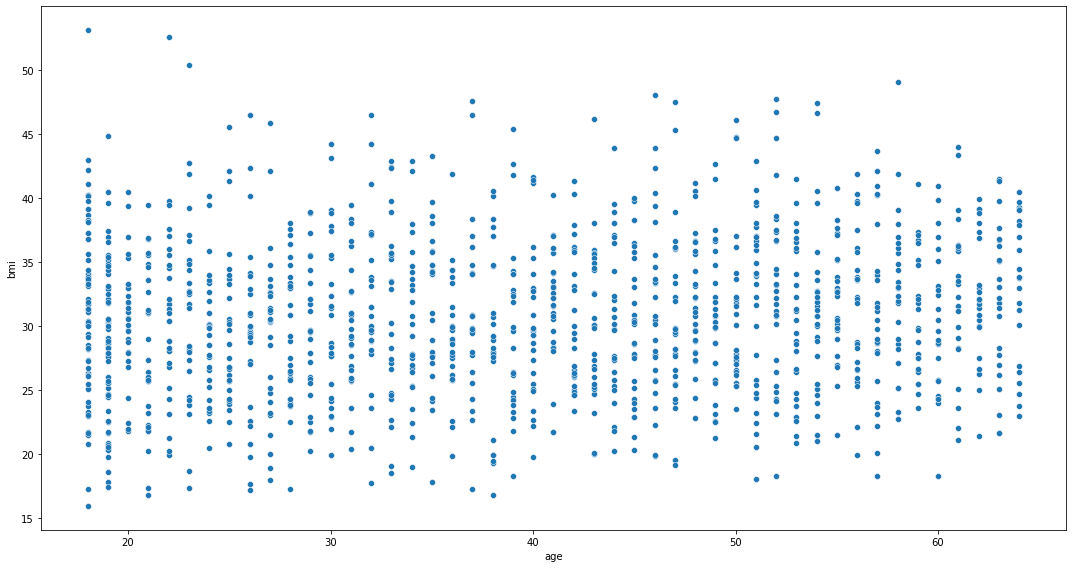

age,64,52,58,61,62,55,48,63,51,56,...,25,28,26,29,36,27,24,38,19,21
bmi,32.976136,32.936034,32.7182,32.548261,32.342609,31.95,31.92569,31.923478,31.727069,31.600962,...,29.693929,29.482143,29.428929,29.383148,29.3742,29.333571,29.142679,28.9966,28.596912,28.185714


In [111]:
plt.figure(figsize=(15,8))
sns.barplot(df["age"],df["bmi"])
plt.show()

plt.figure(figsize=(15,8))
sns.scatterplot(df["age"],df["bmi"])
plt.show()

df.groupby("age").agg({"bmi":"mean"}).sort_values("bmi",ascending=False).T

## Buradaki sonuclara gore ortalama olarak age arttıkca bmi(vücut kitle endeksi) artar.

/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


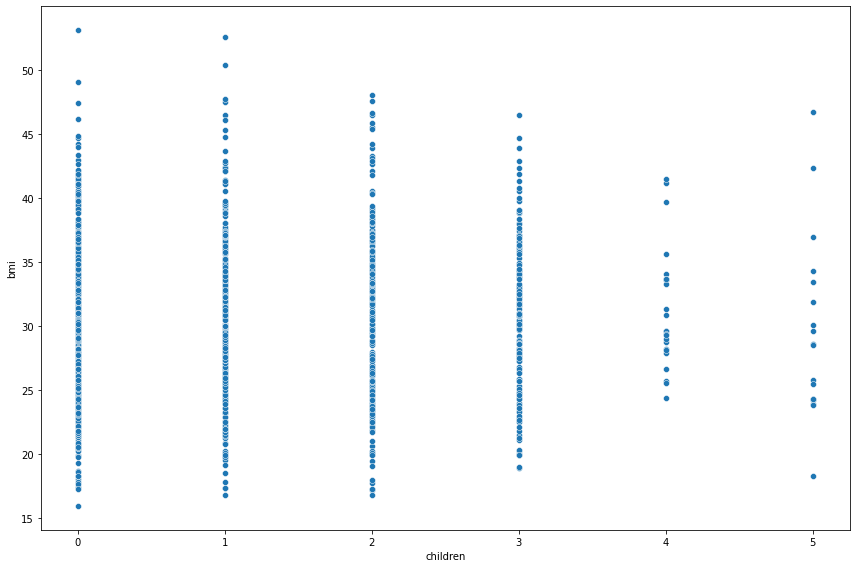

children,4,2,3,1,0,5
bmi,31.3912,30.978104,30.684331,30.623148,30.550296,29.605


In [117]:
plt.figure(figsize=(12,8))
sns.scatterplot(df["children"],df["bmi"])
plt.show()

df.groupby("children").agg({"bmi":"mean"}).sort_values("bmi",ascending=False).head(10).T

## 0-1-2 cocuklu oldugu zaman ortalama olarak bmi yuksek ama 4-5 cocuklu da bmi dusuk. Yani sonuc olarak cocuk sayısı arttıkca bmi dusuk olabilir. 

In [119]:
def outlierThreshold(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr = Q3 - Q1 
    lowerLimit = Q1 - iqr * 1.5
    upperLimit = Q3 + iqr * 1.5
    return lowerLimit,upperLimit
def checkOutlier(df,col):
    lowerLimit,upperLimit = outlierThreshold(df,col)
    outlierDf = df.loc[(df[col] < lowerLimit) | (df[col] > upperLimit)]
    if outlierDf.any(axis=None) == True:
        return True
    else:
        return False 
print(checkOutlier(df,"bmi"))

True


/home/eliftosun/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


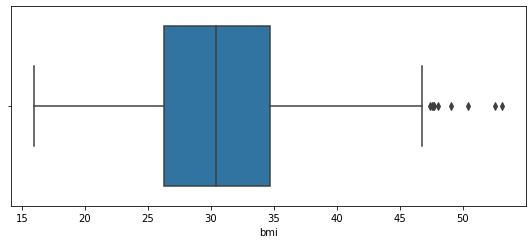

      age     sex    bmi  children smoker     region      charges
1317   18    male  53.13         0     no  southeast   1163.46270
1047   22    male  52.58         1    yes  southeast  44501.39820
847    23    male  50.38         1     no  southeast   2438.05520
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
1088   52    male  47.74         1     no  southeast   9748.91060
860    37  female  47.60         2    yes  southwest  46113.51100
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801


In [121]:
def catchOutliers(df,col,plot=False):
    if plot:
        sns.boxplot(df[col])
        plt.show()
    lowerLimit,upperLimit = outlierThreshold(df,col)
    outlierDf = df.loc[(df[col] < lowerLimit) | (df[col] > upperLimit)]
    return outlierDf.sort_values(col,ascending=False)
print(catchOutliers(df,"bmi",plot=True))